In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df_titanic= pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1 ¿Cuál es el porcentaje de pasajeros que sobrevivieron? Calcula esta métrica desglosada por género y clase.

In [18]:
# Como la coumna Survived contiene 1 para los sobrevivientes y 0 para los que murieron, hacemos la media de esta columna para saber los que sobrevivieron

survival_rate = df_titanic['Survived'].mean() * 100
print(f"El porcentaje de pasajeros que sobrevivieron es: {survival_rate:.2f}%")



El porcentaje de pasajeros que sobrevivieron es: 38.38%


In [22]:
# Uso un groupby ('Sex') y groupby ('Pclass') para agrupar los datos por género y clase
# Supervivencia por género
survival_by_gender = df_titanic.groupby('Sex')['Survived'].mean() * 100
print(survival_by_gender)

# Hago la media para calcula la tasa de supervivencia de cada grupo
# Supervivencia por clase
survival_by_class = df_titanic.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [ ]:
2 ¿Cuál es la distribución de las edades de los pasajeros?

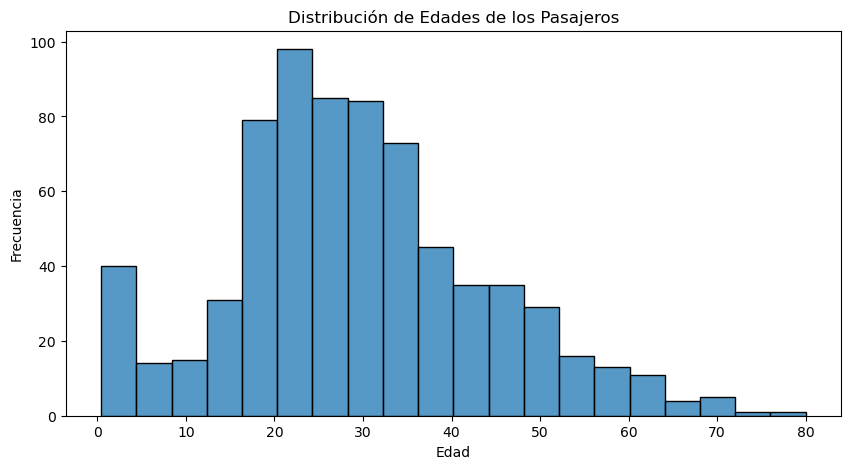

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(df_titanic['Age'])   
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edades de los Pasajeros")
plt.show()

3 ¿Existen valores nulos en el dataset? Si es así, realiza la gestión correspondiente.

In [28]:
# Verificar valores nulos
missing_values = df_titanic.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Age podemos rellenarlo con la mediana
# Cabin podemos directamente descartarla
# Embarked: Hay pocos nulos, podemos rellenarlo con la moda

In [ ]:
4 ¿Qué proporción de pasajeros embarcó desde cada puerto (Embarked)?


In [30]:
#value_counts(normalize=True) devuelve la proporción de pasajeros de cada puerto.

embarked_proportion = df_titanic['Embarked'].value_counts(normalize=True) * 100
print(embarked_proportion)

Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64


5 Determina el promedio de la tarifa (Fare) pagada por los pasajeros según su clase y si sobrevivieron o no.

In [33]:
# Se agrupa por Pclass y Survived y luego se calcula la media con .mean()
fare_mean = df_titanic.groupby(['Pclass', 'Survived'])['Fare'].mean()
print(fare_mean)

Pclass  Survived
1       0           64.684007
        1           95.608029
2       0           19.412328
        1           22.055700
3       0           13.669364
        1           13.694887
Name: Fare, dtype: float64


6 Crea un gráfico de barras que muestre la tasa de supervivencia por clase (Pclass).
Pregunta adicional: ¿Qué clase tuvo la menor tasa de supervivencia?


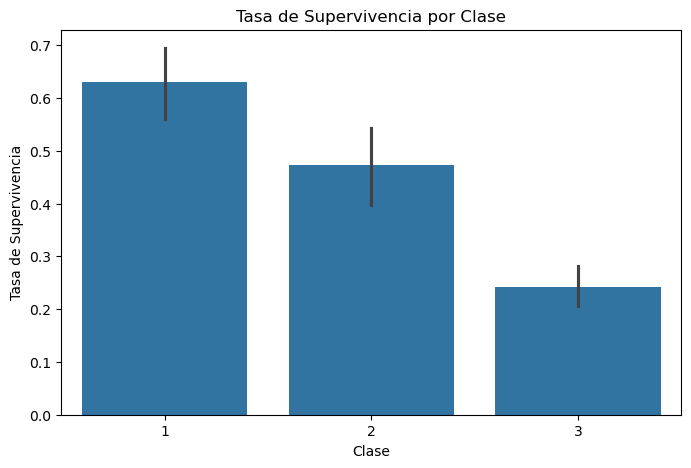

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df_titanic['Pclass'], y=df_titanic['Survived'])
plt.xlabel("Clase")
plt.ylabel("Tasa de Supervivencia")
plt.title("Tasa de Supervivencia por Clase")
plt.show()

In [36]:
# La clase con menor tasa de supervivencia fue la 3


La clase con menor tasa de supervivencia fue la 3


7 Crea un gráfico de barras para comparar el número de sobrevivientes y no sobrevivientes según el género.
Pregunta adicional: ¿Cuál fue el grupo más afectado?


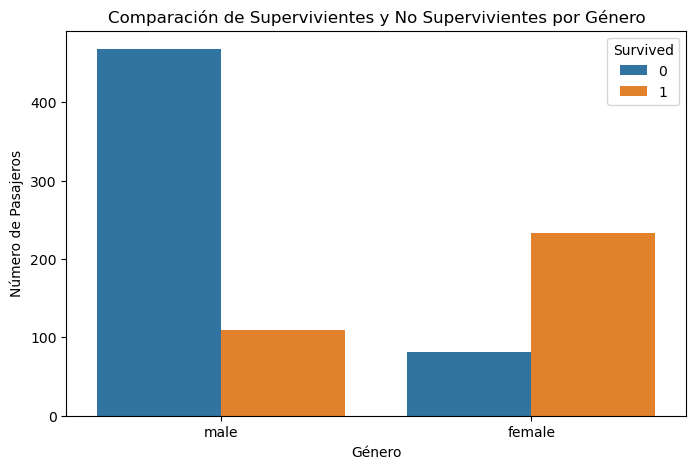

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_titanic['Sex'], hue=df_titanic['Survived'])
plt.xlabel("Género")
plt.ylabel("Número de Pasajeros")
plt.title("Comparación de Supervivientes y No Supervivientes por Género")
plt.show()

In [39]:
# El grupo más afectado fue: male, murieron muchos más hombres que mujeres

8 Realiza un gráfico de caja (boxplot) para visualizar la distribución de tarifas (Fare) por clase (Pclass).

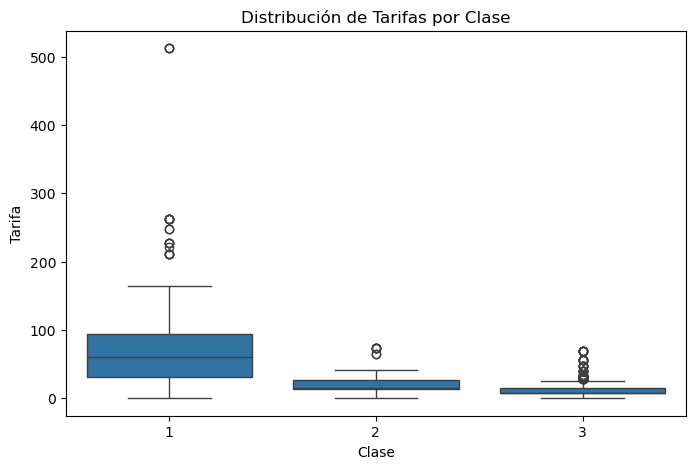

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_titanic['Pclass'], y=df_titanic['Fare'])
plt.xlabel("Clase")
plt.ylabel("Tarifa")
plt.title("Distribución de Tarifas por Clase")
plt.show()

In [ ]:
# Hay valores atípicos, principalemtne en primera y en tercera clase.

9 Genera un gráfico de dispersión que relacione Age y Fare, diferenciando con colores si sobrevivieron o no.
Pista: Usa hue si estás trabajando con librerías como Seaborn.

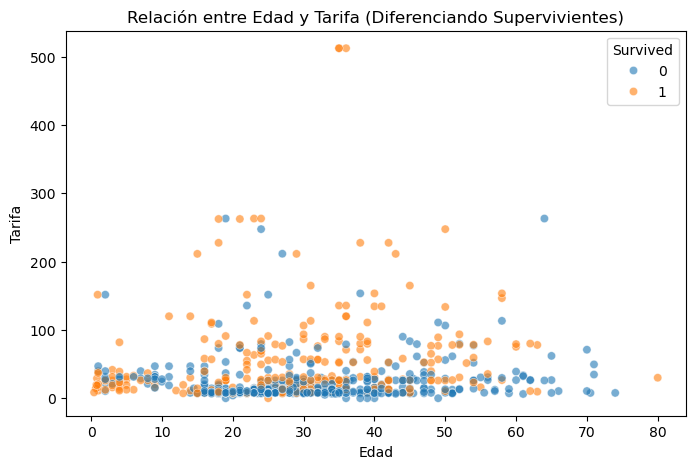

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_titanic['Age'], y=df_titanic['Fare'], hue=df_titanic['Survived'], alpha=0.6)
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.title("Relación entre Edad y Tarifa (Diferenciando Supervivientes)")
plt.show()